# Supervised Machine Learning: Classification

Importing Insurance data set

Kaggle Link (https://www.kaggle.com/mirichoi0218/insurance)

Although the data is for prediction of charges based on customer information, we are using it here to predict whether the customer is a smoker or not given the information and charges.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [110]:
path = 'https://github.com/JVasquez5/IBM-Machine-Learning-Professional-Certificate/blob/main/Module_2/insurance.csv?raw=true'
df = pd.read_csv(path)
df.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [111]:
df.shape

(1338, 7)

In [112]:
df.info() # sex, smoker, and region are categorical values and need to be encoded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [113]:
df.isnull().sum() #no missing or NaN values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [114]:
df.nunique() #encoding would convert sex, smoker and region

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

## Distribution of Data

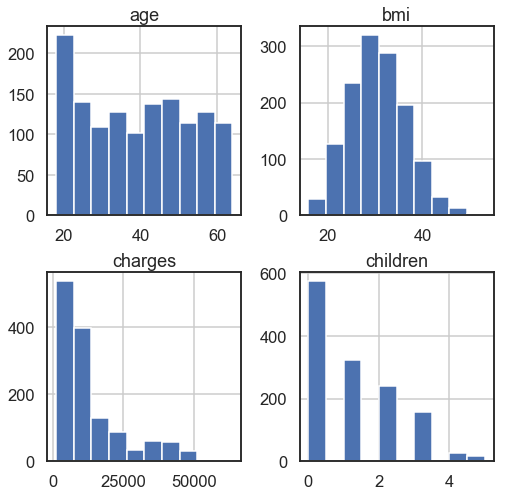

In [116]:
# Histogram to visualize data
df_visual_hist = df.hist(figsize = (8,8))

Text(0.5,1,'Count of Region')

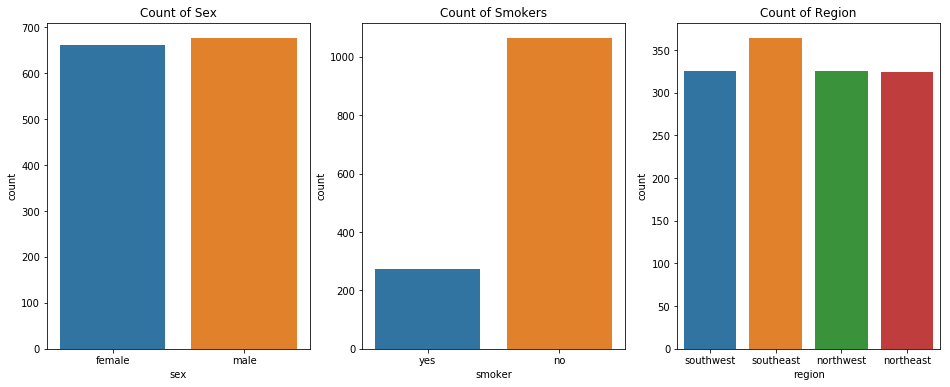

In [8]:
f, axes = plt.subplots(1,3, figsize=(16, 6))
sns.countplot(x="sex",  data=df, ax = axes[0])
sns.countplot(x="smoker",  data=df, ax = axes[1])
sns.countplot(x="region",  data=df, ax = axes[2])

axes[0].set_title('Count of Sex')
axes[1].set_title('Count of Smokers')
axes[2].set_title('Count of Region')

## Feature Engineering
1) Converting category labels into numerical using One-hot encoder

2) scaling Age and BMI



In [119]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label = LabelEncoder()

label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)

label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)


df = pd.get_dummies(df, columns=['region'])
df.drop(columns = ['region_southwest'], inplace = True)

df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast
0,19,0,27.900,0,1,16884.92400,0,0,0
1,18,1,33.770,1,0,1725.55230,0,0,1
2,28,1,33.000,3,0,4449.46200,0,0,1
3,33,1,22.705,0,0,21984.47061,0,1,0
4,32,1,28.880,0,0,3866.85520,0,1,0


### Normalize Age, BMI, Charges

In [120]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale = ['age', 'bmi','charges']
df[scale] = scaler.fit_transform(df[scale])
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast
0,0.021739,0,0.321227,0,1,0.251611,0,0,0
1,0.000000,1,0.479150,1,0,0.009636,0,0,1
2,0.217391,1,0.458434,3,0,0.053115,0,0,1
3,0.326087,1,0.181464,0,0,0.333010,0,1,0
4,0.304348,1,0.347592,0,0,0.043816,0,1,0


In [121]:
df.describe()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.461022,0.505232,0.395572,1.094918,0.204783,0.193916,0.242152,0.242900,0.272048
std,0.305434,0.500160,0.164062,1.205493,0.403694,0.193301,0.428546,0.428995,0.445181
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.000000,0.278080,0.000000,0.000000,0.057757,0.000000,0.000000,0.000000
50%,0.456522,1.000000,0.388485,1.000000,0.000000,0.131849,0.000000,0.000000,0.000000
75%,0.717391,1.000000,0.504002,2.000000,0.000000,0.247700,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000


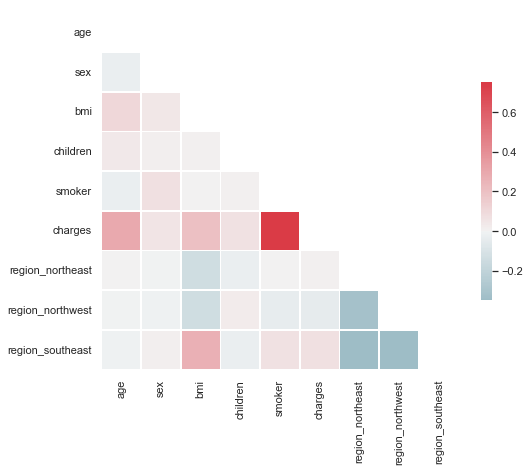

In [123]:
#Heatmap to visualize correlations
sns.set(style='white')
corr = df.corr() 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.75, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5});

## Ratio of non/smokers

Text(0,0.5,'Frequency')

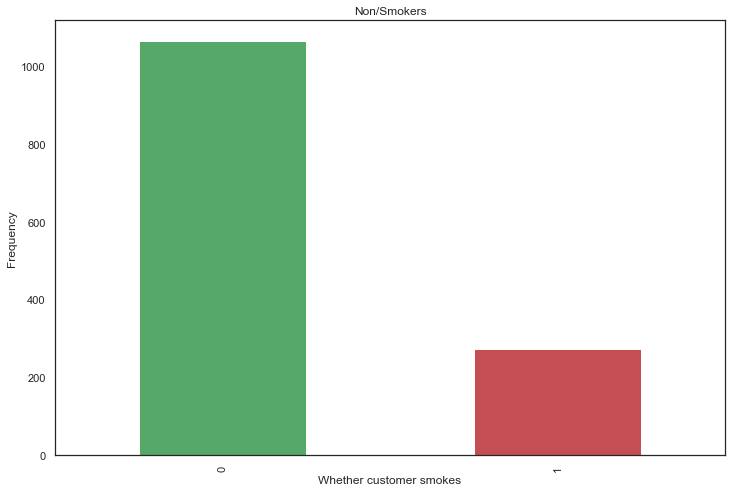

In [13]:
plt.figure(figsize = (12,8))

df_visual_bar = df.smoker.value_counts().plot(
    figsize=(12, 8), kind='bar', color = ['g', 'r'])
plt.title('Non/Smokers')
plt.xlabel('Whether customer smokes')
plt.ylabel('Frequency')

## Stratified Train/Test Split

In [14]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, stratify=df.smoker,test_size=0.3,random_state=42)

In [15]:
train['smoker'].describe()

count    936.000000
mean       0.205128
std        0.404011
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: smoker, dtype: float64

In [16]:
test['smoker'].describe()

count    402.000000
mean       0.203980
std        0.403456
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: smoker, dtype: float64

Text(0,0.5,'Frequency')

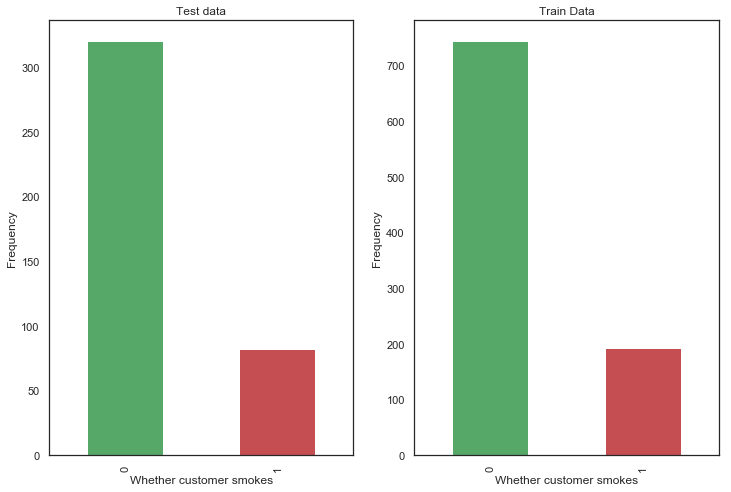

In [17]:
y_test = test['smoker']
y_train = train['smoker']


X_test = test.drop(columns = ['smoker'])
X_train = train.drop(columns = ['smoker'])


plt.figure(figsize = (12,8))
plt.subplot(121)

df_visual_bar = y_test.value_counts().plot(
    figsize=(12, 8), kind='bar', color = ['g', 'r'])
plt.title('Test data')
plt.xlabel('Whether customer smokes')
plt.ylabel('Frequency')

plt.subplot(122)
df_visual_bar = y_train.value_counts().plot(
    figsize=(12, 8), kind='bar', color = ['g', 'r'])
plt.title('Train Data')
plt.xlabel('Whether customer smokes')
plt.ylabel('Frequency')

## Models
- Standard logistic regression, K-nearest neighbors algorithm, Decision Tree
- Plot the results using heatmaps
- Compare scores: precision, recall, accuracy, F1 score, auc

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score

### Logistic Regression

In [19]:
# create dataframe for metrics
metrics = pd.DataFrame()

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

precision_lr, recall_lr = (round(float(x),2) for x in list(score(y_test,
                                                                    y_pred_lr,
                                                                    average='weighted'))[:-2])
# adding lr stats to metrics DataFrame
lr_stats = pd.Series({'precision':precision_lr,
                      'recall':recall_lr,
                      'accuracy':round(accuracy_score(y_test, y_pred_lr), 2),
                      'f1score':round(f1_score(y_test, y_pred_lr), 2),
                      'auc': round(roc_auc_score(y_test, y_pred_lr),2)},
                     name='Logistic Regression')
# Report outcomes
pd.DataFrame(classification_report(y_test, y_pred_lr, output_dict=True)).iloc[:3,:2]

,0,1
f1-score,0.935917,0.676692
precision,0.894587,0.882353
recall,0.981250,0.548780


## KNN

In [48]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

precision_knn, recall_knn = (round(float(x),2) for x in list(score(y_test,
                                                                      y_pred_knn,
                                                                      average='weighted'))[:-2])
# adding KNN stats to metrics DataFrame
knn_stats = pd.Series({'precision':precision_knn,
                      'recall':recall_knn,
                      'accuracy':round(accuracy_score(y_test, y_pred_knn), 2),
                      'f1score':round(f1_score(y_test, y_pred_knn), 2),
                      'auc': round(roc_auc_score(y_test, y_pred_knn),2)}, name='KNN')
# Report outcomes
pd.DataFrame(classification_report(y_test, y_pred_knn, output_dict=True)).iloc[:3,:2]

,0,1
f1-score,0.949924,0.772414
precision,0.923304,0.888889
recall,0.978125,0.682927


## Decision Trees

In [124]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)
dt.tree_.node_count, dt.tree_.max_depth

y_train_pred = dt.predict(X_train)
y_pred_dt = dt.predict(X_test)

precision_dt, recall_dt = (round(float(x),2) for x in list(score(y_test,
                                                                y_pred_dt,
                                                                average='weighted'))[:-2])
# adding dt stats to metrics DataFrame
dt_stats = pd.Series({'precision':precision_dt,
                      'recall':recall_dt,
                      'accuracy':round(accuracy_score(y_test, y_pred_dt), 2),
                      'f1score':round(f1_score(y_test, y_pred_dt), 2),
                      'auc': round(roc_auc_score(y_test, y_pred_dt),2)}, name='Decision Tree')
# Report outcomes
pd.DataFrame(classification_report(y_test, y_pred_dt, output_dict=True)).iloc[:3,:2]

,0,1
f1-score,0.970634,0.878981
precision,0.960245,0.920000
recall,0.981250,0.841463


In [125]:
dt.tree_.node_count, dt.tree_.max_depth

(73, 12)

## Summary

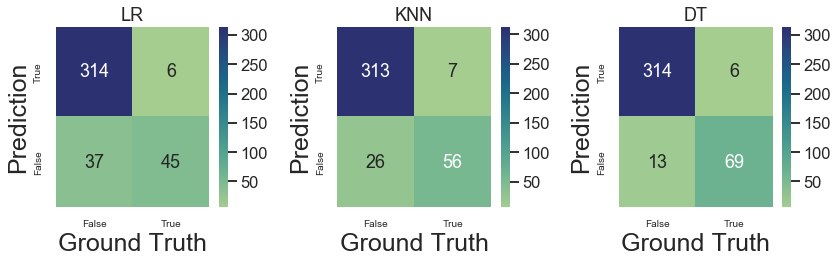

In [49]:
fig, axList = plt.subplots(nrows=1, ncols=3)
axList = axList.flatten()
fig.set_size_inches(12, 4)


models = coeff_labels = ['LR', 'KNN', 'DT']
cm = [confusion_matrix(y_test, y_pred_lr),
      confusion_matrix(y_test, y_pred_knn),
      confusion_matrix(y_test, y_pred_dt)]
#       confusion_matrix(y_test, y_pred_rf)]
labels = ['False', 'True']

for ax,model, idx in zip(axList, models, range(0,3)):
    sns.heatmap(cm[idx], ax=ax, annot=True, fmt='d', cmap='crest');
    ax.set(title=model);
    ax.set_xticklabels(labels, fontsize=10);
    ax.set_yticklabels(labels[::-1], fontsize=10);
    ax.set_ylabel('Prediction', fontsize=25);
    ax.set_xlabel('Ground Truth', fontsize=25)
    
plt.tight_layout()

In [50]:
metrics.append([lr_stats, knn_stats, dt_stats]) #average error report

,precision,recall,accuracy,f1score,auc
Logistic Regression,0.89,0.89,0.89,0.68,0.77
KNN,0.92,0.92,0.92,0.77,0.83
Decision Tree,0.95,0.95,0.95,0.88,0.91


### DT model outperforms the other 2 models

In [79]:
y_pred = pd. DataFrame(y_pred_dt, columns=['Prediction'])

dt_df = pd.concat([X_test,y_test,y_pred], axis=1, ignore_index=False)
# NaN values are for the train set index
dt_df.dropna(axis =0, inplace=True)
dt_df.head() 

,age,sex,bmi,children,charges,region_northeast,region_northwest,region_southeast,smoker,Prediction
0,0.021739,0.0,0.321227,0.0,0.251611,0.0,0.0,0.0,1.0,0.0
2,0.217391,1.0,0.458434,3.0,0.053115,0.0,0.0,1.0,0.0,0.0
5,0.282609,0.0,0.263115,0.0,0.042056,0.0,0.0,1.0,0.0,0.0
9,0.913043,0.0,0.265806,0.0,0.443765,0.0,1.0,0.0,0.0,0.0
16,0.739130,0.0,0.398709,1.0,0.154440,1.0,0.0,0.0,0.0,1.0


In [100]:
dt_df.groupby('Prediction', as_index=True)['charges'].mean()

Prediction
0.0    0.221537
1.0    0.139090
Name: charges, dtype: float64

In [101]:
dt_df.groupby('smoker', as_index=True)['charges'].mean()

smoker
0.0    0.119585
1.0    0.474065
Name: charges, dtype: float64

In [105]:
dt_df.groupby('smoker', as_index=True)['children'].mean()

smoker
0.0    1.084337
1.0    0.923077
Name: children, dtype: float64

In [104]:
dt_df.groupby('Prediction', as_index=True)['children'].mean()

Prediction
0.0    1.093023
1.0    0.869565
Name: children, dtype: float64

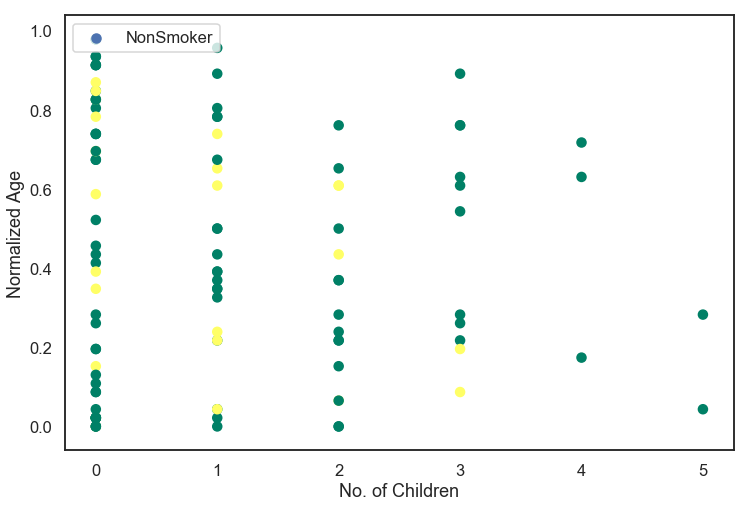

In [108]:
plt.figure(figsize = (12,8))
plt.scatter(dt_df['children'],dt_df['age'],c=dt_df['Prediction'],cmap ='summer')
plt.xlabel('No. of Children')
plt.ylabel('Normalized Age')
plt.legend(['NonSmoker', 'Smoker'],loc ="upper left")
plt.show()